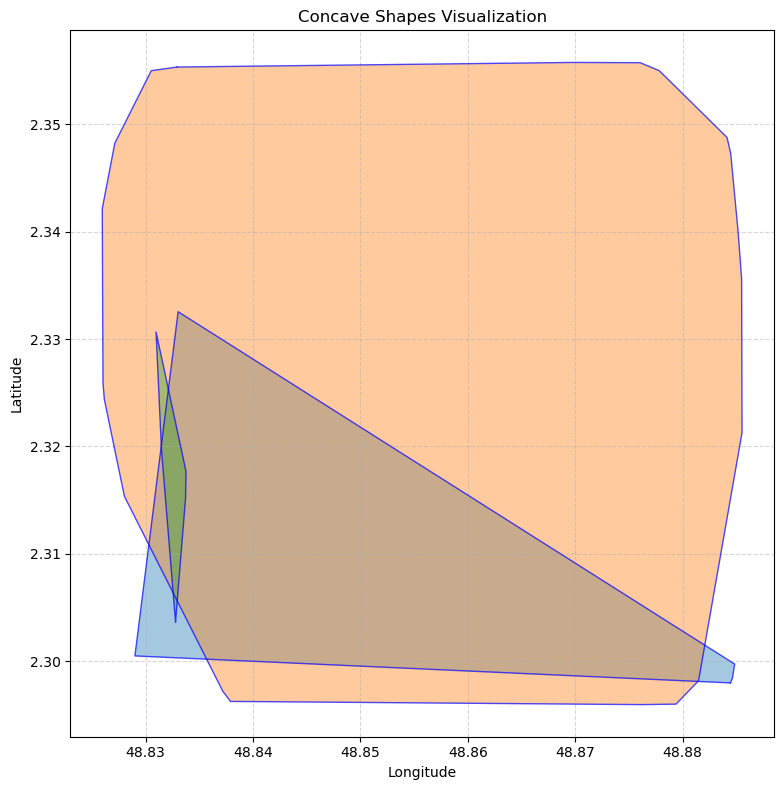

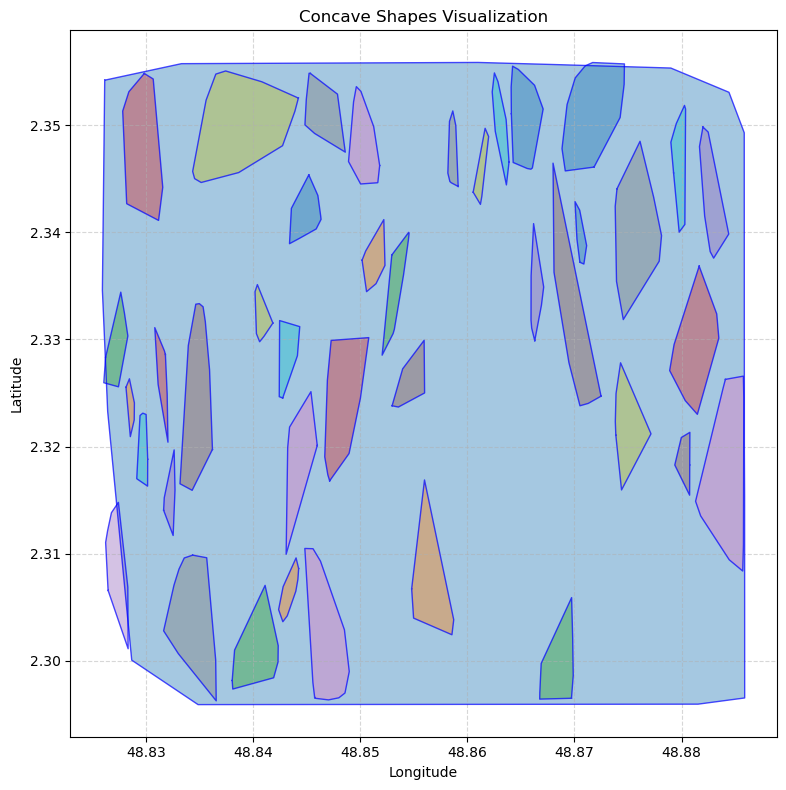

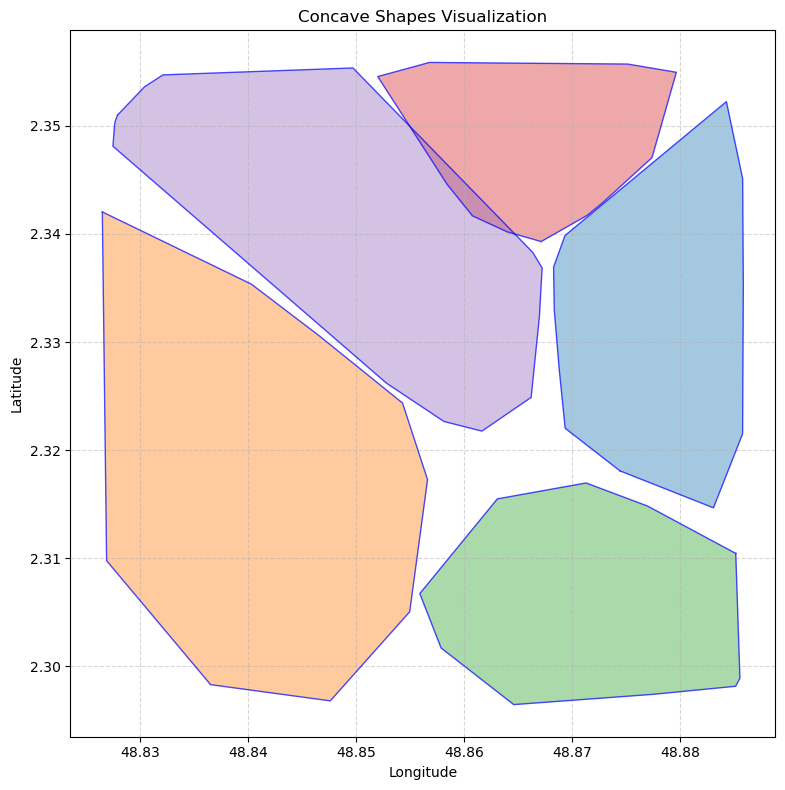

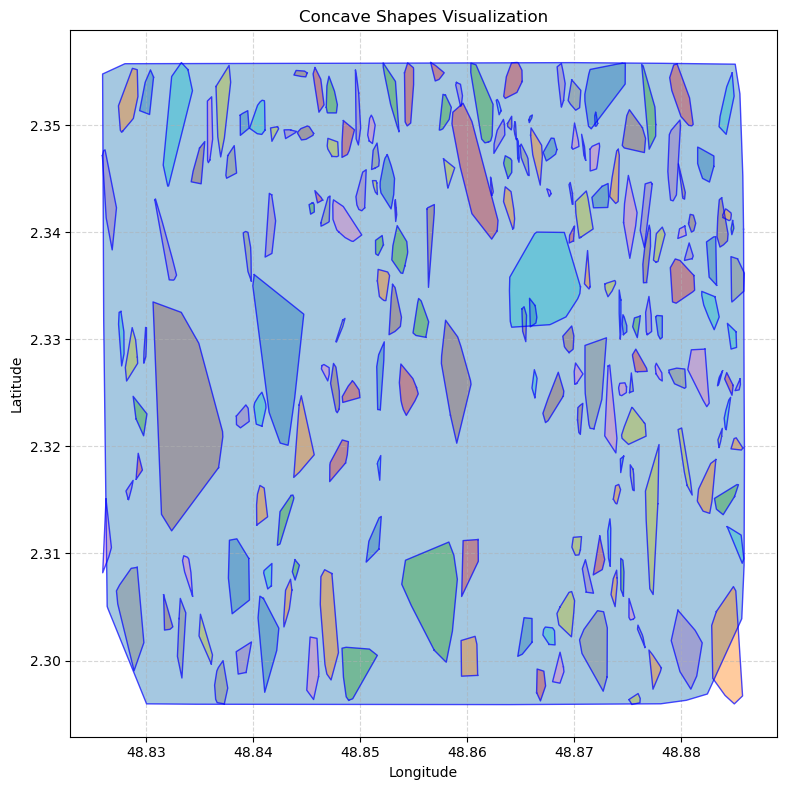

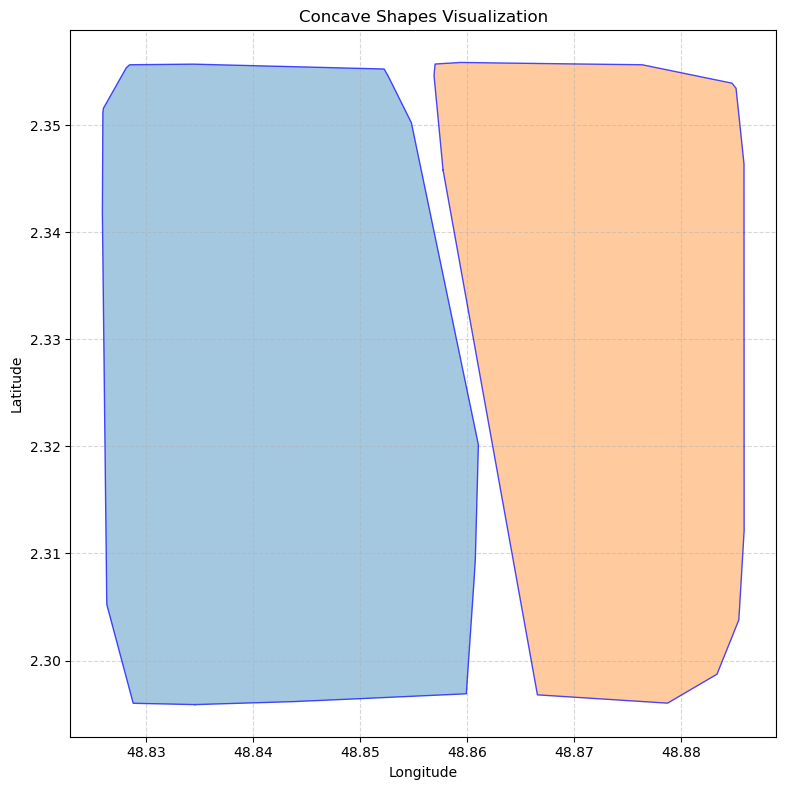

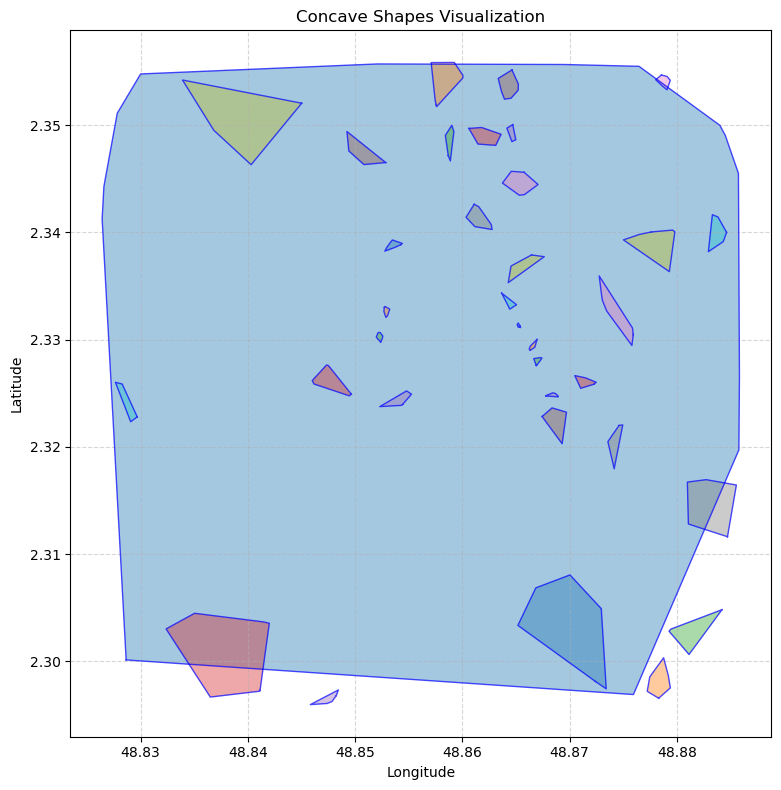

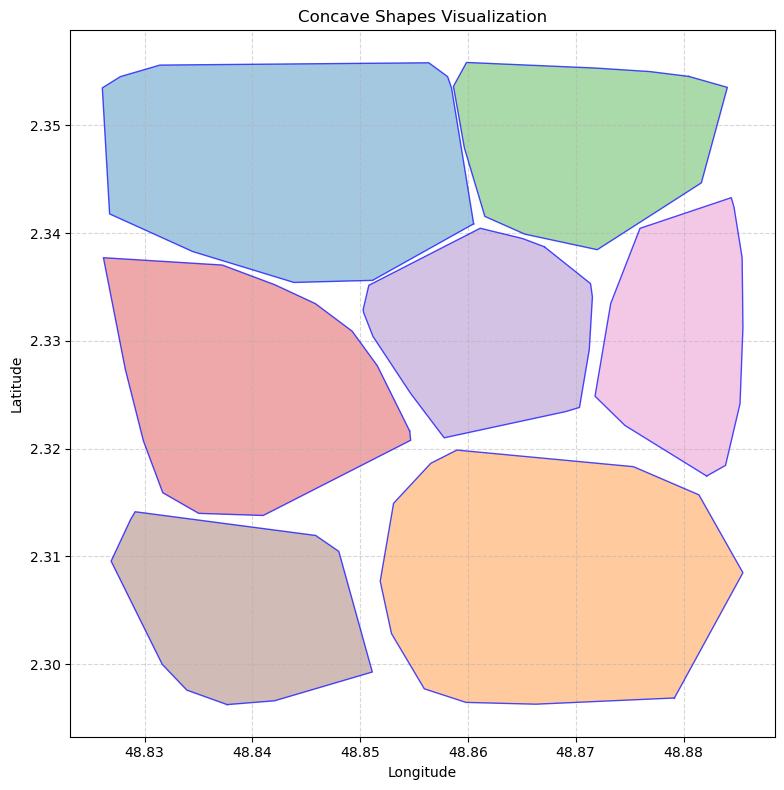

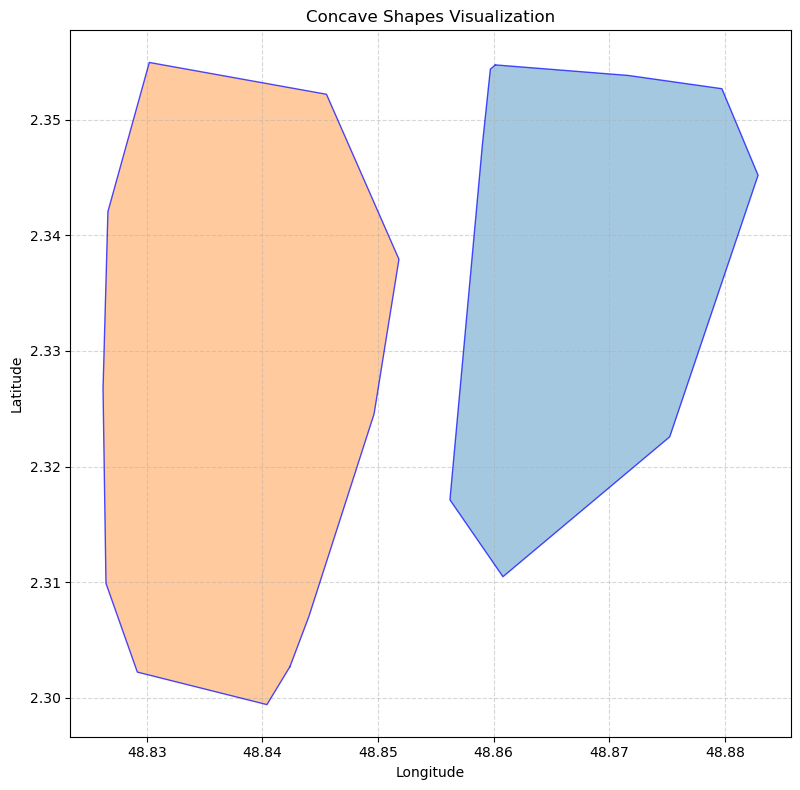

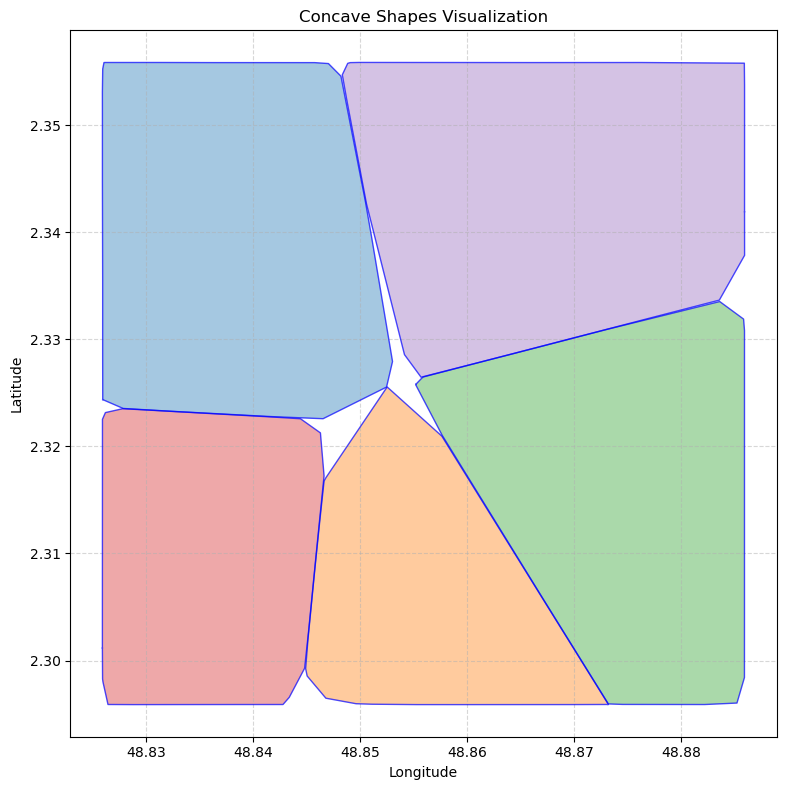

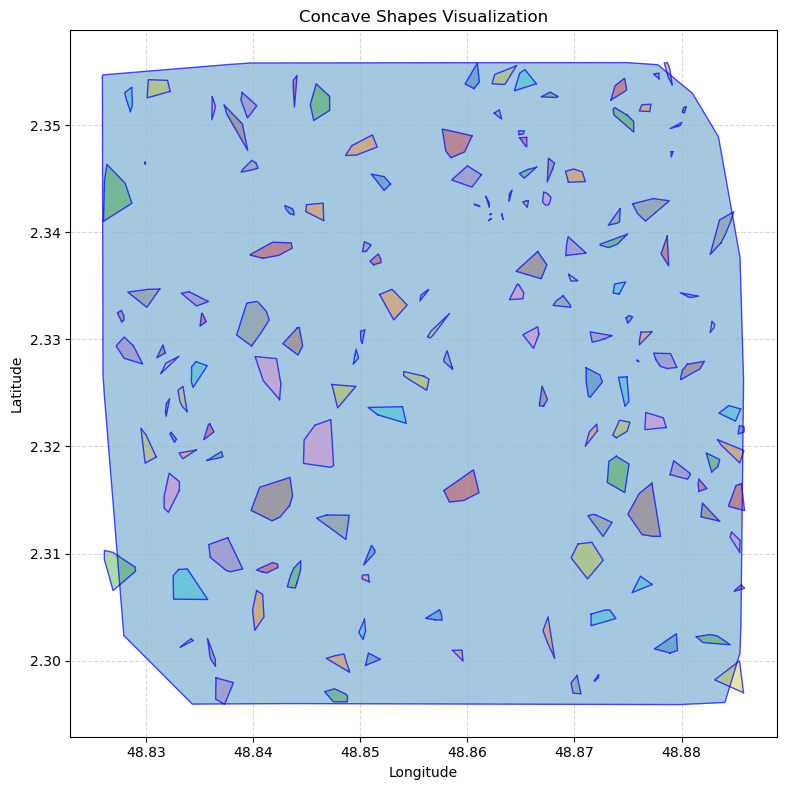

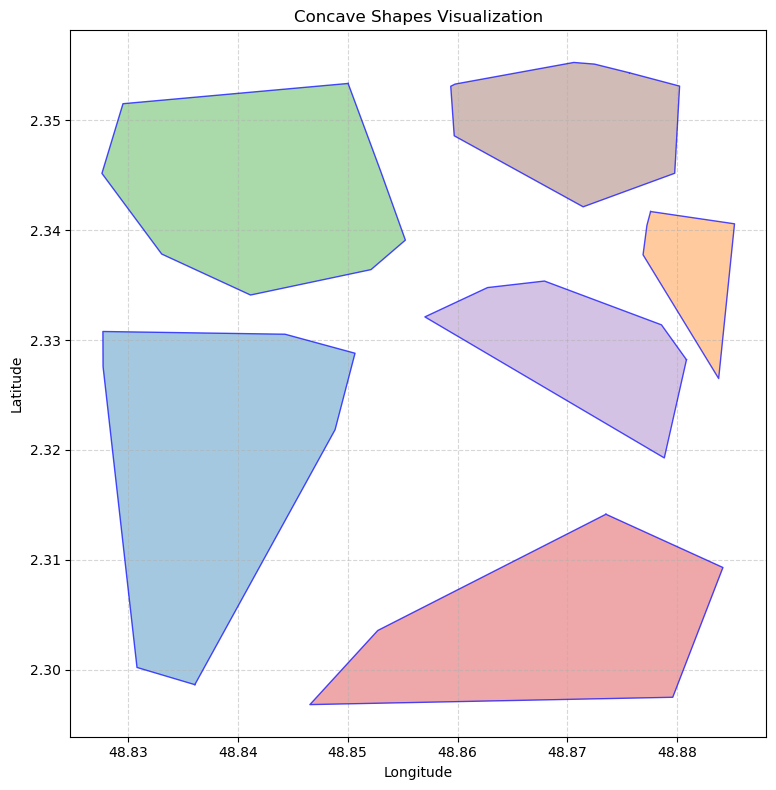

In [36]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np
import pyarrow as pd
import pyarrow.parquet as pq
import pyarrow.compute as pc

table=pq.read_table('../data/processed/clusters.zstd')
for column in set(table.select(['group']).to_pydict()['group']):
    expr=pc.field("group")==column
    coordinates=table.filter(expr).drop(['group','cluster_number'])[0]

    # Convert PyArrow array to numpy first
    coordinates_np = coordinates.to_numpy()  # Converts (143, 22, 2) pyarrow array to numpy

    plt.figure(figsize=(12, 8))

    for shape in coordinates_np:
        # Convert PyArrow scalars to Python floats
        clean_shape = np.array([[float(x), float(y)] for x, y in shape])
        
        # Remove any NaN/inf points that might exist
        clean_shape = clean_shape[~np.isnan(clean_shape).any(axis=1)]
        
        if len(clean_shape) >= 3:  # Need minimum 3 points for a polygon
            polygon = Polygon(clean_shape)
            x, y = polygon.exterior.xy
            plt.fill(x, y, alpha=0.4)
            plt.plot(x, y, color='blue', alpha=0.7, linewidth=1)

    plt.title('Concave Shapes Visualization')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()